# The Beauty of Roots
https://math.ucr.edu/home/baez/roots \
https://wiegreffe.info/home/fractals-from-complex-roots-of-polynomials

Wikipedia \
https://en.wikipedia.org/wiki/Algebraic_number \
https://en.wikipedia.org/wiki/Littlewood_polynomial

Wolfram \
https://mathworld.wolfram.com/PolynomialRoots.html

Littlewood Polynomial

$$\sum_{k=0}^{n}a_k x^k = 0$$
$$a_k \in \left \{-1,1\right \}$$

In [1]:
import numpy as np
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
from collections import defaultdict

from celluloid import Camera
from matplotlib import animation

plt.style.use('dark_background')

In [3]:
import sys
sys.path.append('../')

In [ ]:
import consts
from modules import visualize, pisot_search, poly_utils, animate

import importlib
importlib.reload(pisot_search)

## Random polynomials

In [ ]:
import random

def generate_rand_poly(max_degree):
  length = random.randint(2, max_degree)
  options = [1, 0, -1]
  coeffs = []
  for _ in range(length):
      coeffs.append(random.choice(options))
  return coeffs

# Test the function.
poly = np.poly1d(generate_rand_poly(5))
print(poly)
print(poly.order)
print(poly.roots)

In [5]:
max_degree, nun_iters = 15, 100000
roots_order = defaultdict(list)
for _ in tqdm(range(nun_iters)):
  poly = np.poly1d(generate_rand_poly(max_degree))
  roots_order[poly.order].extend(poly.roots)

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

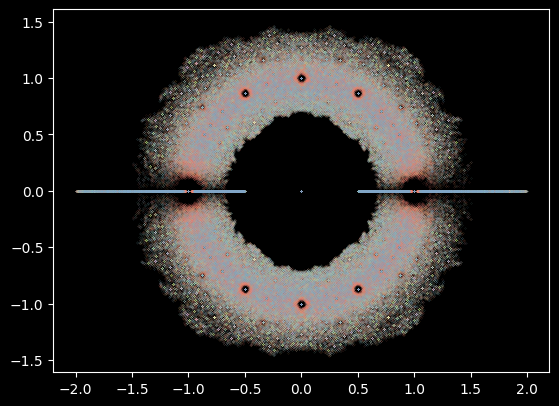

In [6]:
# plt.figure(figsize=(24, 24))
plt.gca().set_aspect('equal')

for order, roots in tqdm(roots_order.items()):
  roots = np.array(roots)
  plt.scatter(roots.real, roots.imag, s=0.01, alpha=0.6)

## All polynomials

In [7]:
import itertools

max_degree = 15
all_coeffs = list(itertools.product([-1,1], repeat=max_degree))

roots = []
for coeffs in tqdm(all_coeffs):
  poly = np.poly1d(coeffs)
  roots.extend(poly.roots)
roots = np.array(roots)

print(len(all_coeffs))  # 2**max_degree
print('total roots =', len(roots))  # (max_degree-1) * (2**max_degree)

  0%|          | 0/32768 [00:00<?, ?it/s]

32768
total roots = 458752


In [8]:
# Remove duplicated (would affect density)
roots = np.unique(roots)
print('total unique roots =', len(roots))

# Remove purely realy roots.
print(f'purely real roots = {sum(roots.imag==0)}, {100*sum(roots.imag==0)/len(roots):.3f}%')
roots = roots[roots.imag!=0]
print('total unique complex roots =', len(roots))

total unique roots = 225914
purely real roots = 31390, 13.895%
total unique complex roots = 194524


In [9]:
region_roots = defaultdict(list)
for root in roots:
  if 1/consts.salem_const <= abs(root) <= consts.salem_const:
    region_roots['region_1'].append(root)
  elif 1/consts.plastic_const <= abs(root) <= consts.plastic_const:
    region_roots['region_2'].append(root)
  elif 1/consts.phi <= abs(root) <= consts.phi:
    region_roots['region_3'].append(root)
  else:
    raise ValueError('root out of bounds')
region_roots = {region: np.array(roots) for region, roots in region_roots.items()}

roots = np.concatenate(list(region_roots.values()))

### plot based on density

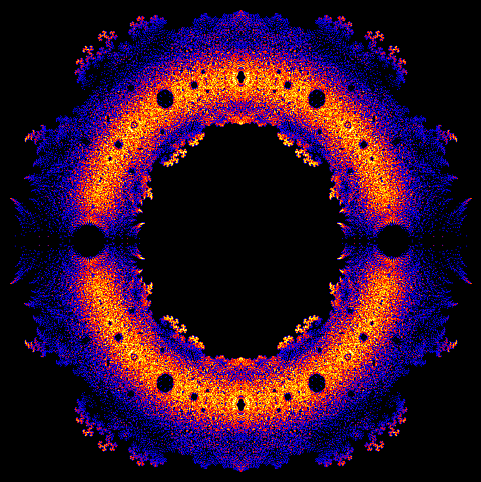

In [ ]:
import matplotlib as mpl
from scipy.stats import gaussian_kde

plt.figure(figsize=(6, 6))
plt.gca().set_aspect('equal')
plt.axis('off')

def create_custom_colormap():
    colors = [(0, 0, 0),  (0, 0, 1), (1, 0, 0), (1, 0.5, 0), (1, 1, 0), (1,1,1)]
    return mpl.colors.LinearSegmentedColormap.from_list('KROY', colors)

H, xedges, yedges = np.histogram2d(roots.real, roots.imag, bins=1001)
unique_values, value_counts = np.unique(H, return_counts=True)
unique_values, value_counts = unique_values[1:], value_counts[1:]
sorted_indices = np.argsort(value_counts)[::-1]
unique_values, value_counts = unique_values[sorted_indices], value_counts[sorted_indices]
# print(unique_values.astype(int))
# print(value_counts)

vals_to_map = np.linspace(1,0,len(unique_values), endpoint=False)
normed_H = np.zeros_like(H)
for val, mapped_val in zip(unique_values, vals_to_map):
  normed_H[H==val] = mapped_val
cust_cmap = create_custom_colormap()
plt.imshow(normed_H.T, cmap=cust_cmap)
# plt.imshow(normed_H.T, mpl.colormaps['hot'])
plt.show()

### plot with manually assigned colors

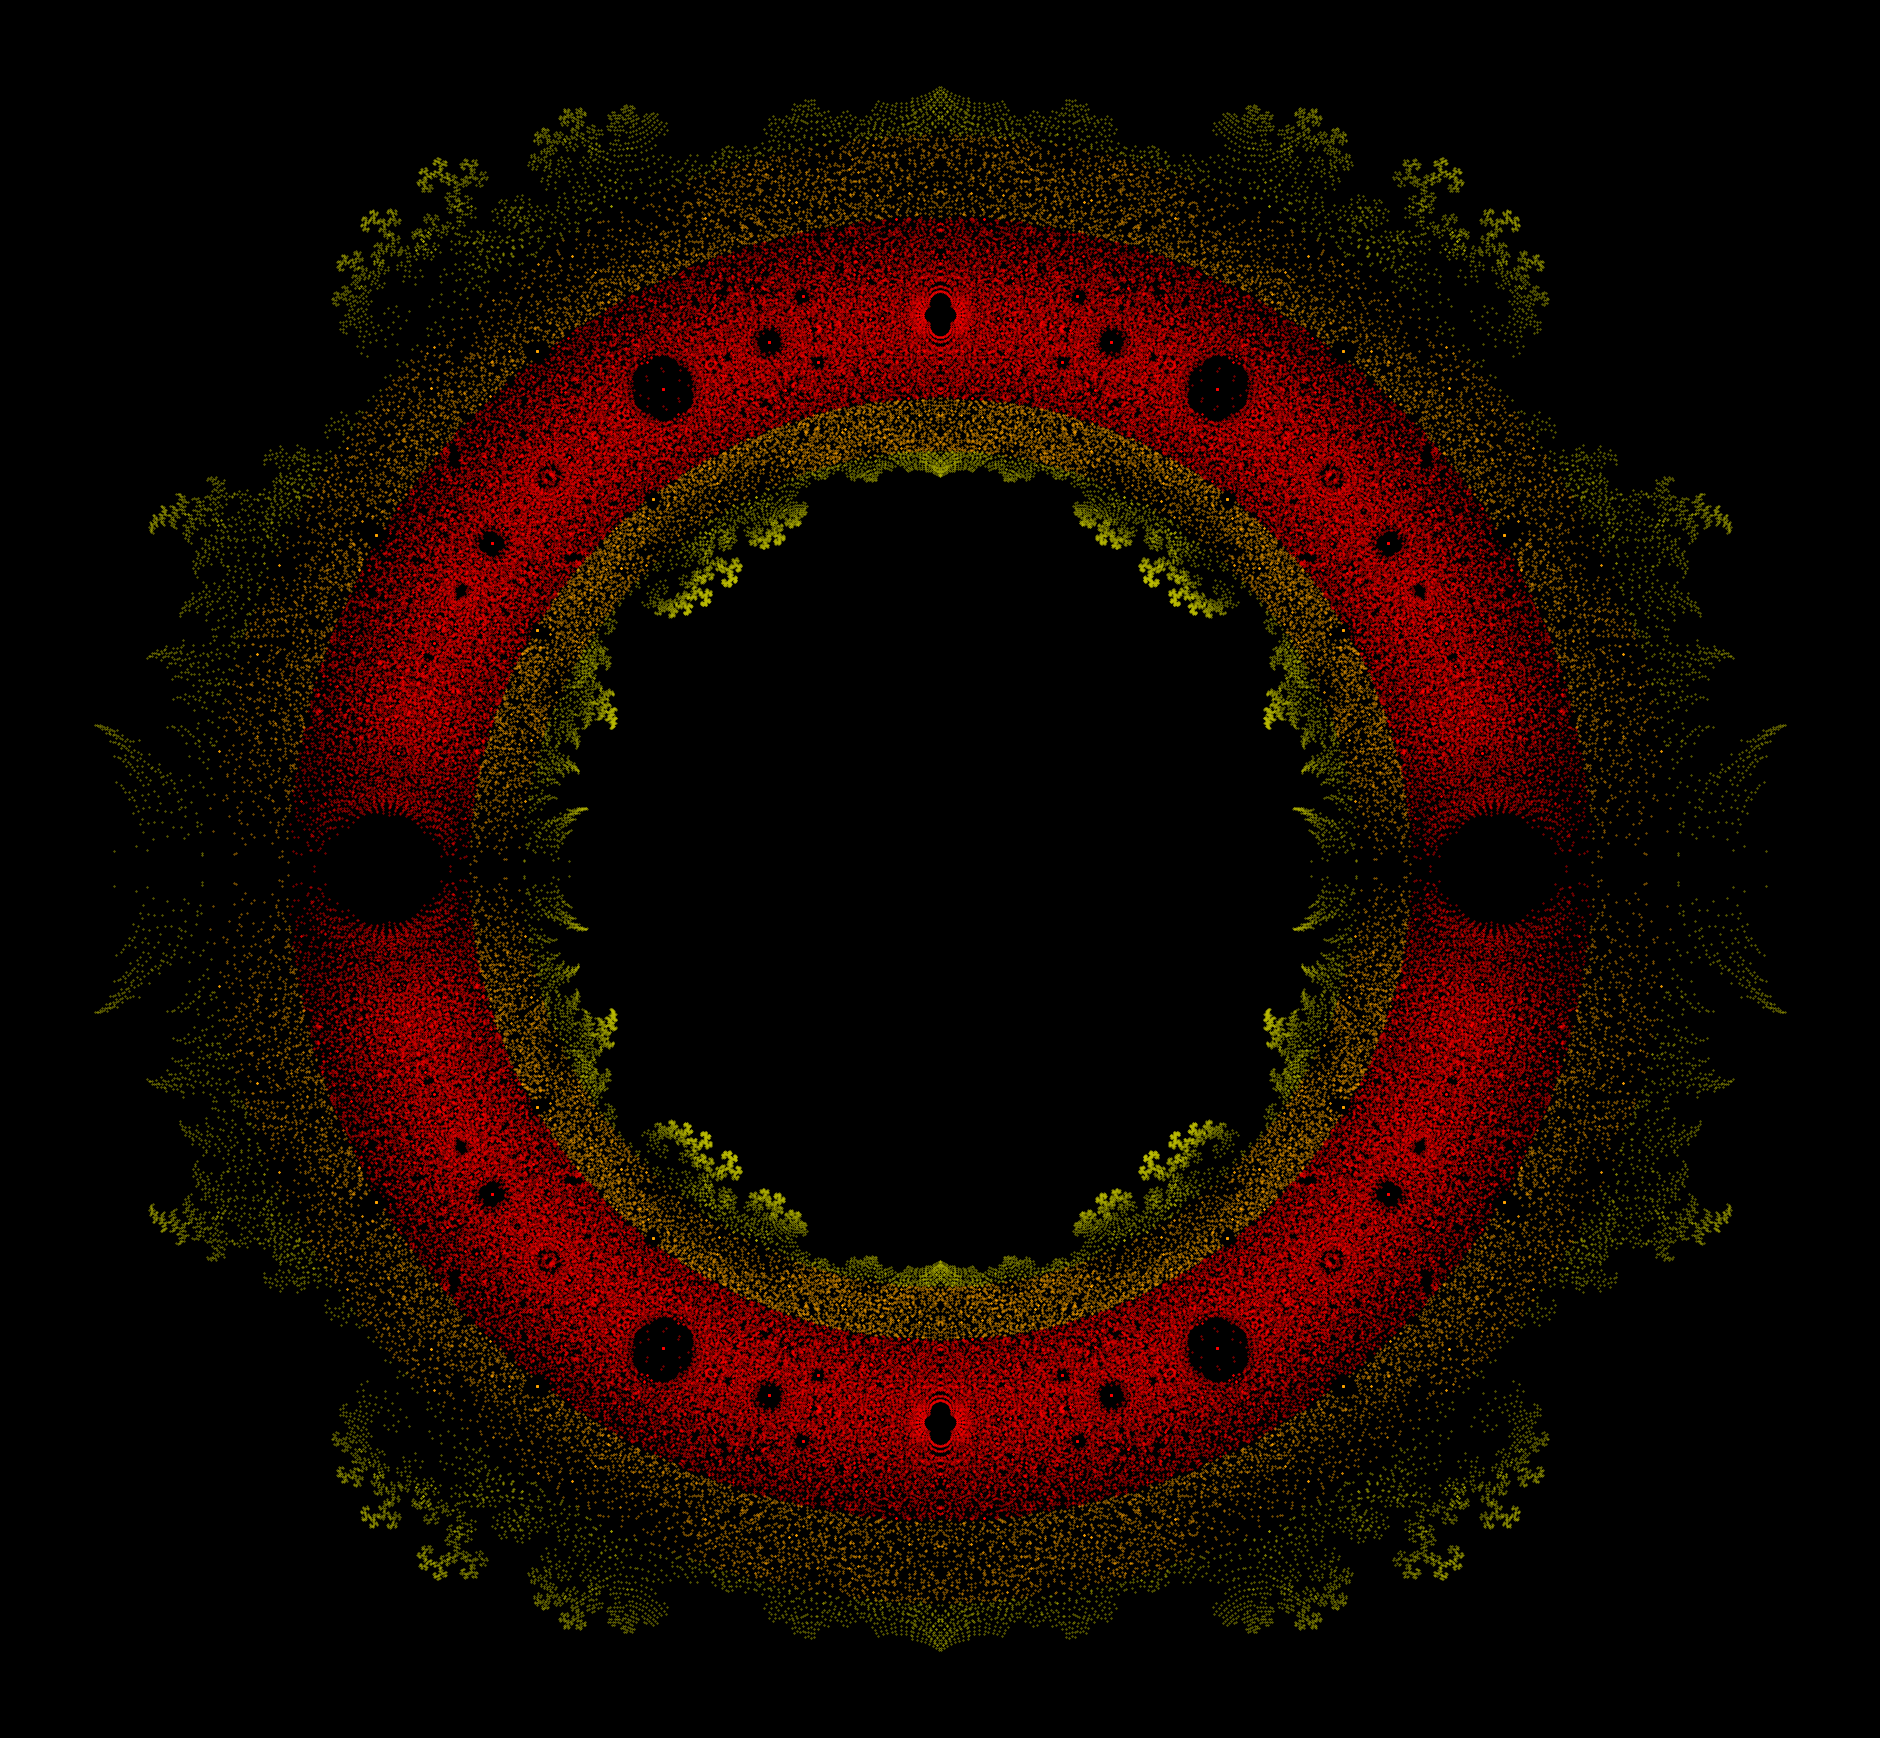

In [14]:
figsize = 24
point_size = 10**(np.log2(figsize/3) - 4)

plt.figure(figsize=(figsize, figsize))
plt.gca().set_aspect('equal')
plt.axis('off')
# plt.title(r'$\sum_{k=0}^{n}a_k x^k = 0, a_k \in \left \{-1,1\right \}$', fontsize=2*figsize)

# t = np.linspace(0,2*np.pi, 100)
# plt.plot(np.cos(t), np.sin(t), c='b', ls='--')

# plt.plot(consts.phi*np.cos(t), consts.phi*np.sin(t), c='y')
# plt.plot((1/consts.phi)*np.cos(t), (consts.phi-1)*np.sin(t), c='y')

# plt.plot(consts.plastic_const*np.cos(t), consts.plastic_const*np.sin(t), c='orange')
# plt.plot((1/consts.plastic_const)*np.cos(t), (1/consts.plastic_const)*np.sin(t), c='orange')

# plt.plot(consts.salem_const*np.cos(t), consts.salem_const*np.sin(t), c='r')
# plt.plot((1/consts.salem_const)*np.cos(t), (1/consts.salem_const)*np.sin(t), c='r')


plt.scatter(region_roots['region_1'].real, region_roots['region_1'].imag, s=point_size, c='r')
plt.scatter(region_roots['region_2'].real, region_roots['region_2'].imag, s=point_size, c='orange')
plt.scatter(region_roots['region_3'].real, region_roots['region_3'].imag, s=point_size, c='y')

plt.show()

### Animate

In [46]:
def transform(roots, t):
  # x = roots - (roots - roots/abs(roots)**2) * t  # lerp
  x = (roots - (roots + roots)*t)/(abs(roots)**(2*t))  # exp lerp
  return x.real, x.imag

def animate(roots, steps):
  fig, ax = plt.subplots(figsize=(figsize,figsize))
  camera = Camera(fig)
  plt.axis('off')

  for t in tqdm(np.linspace(0,1,steps)):
    plt.scatter(*transform(region_roots['region_1'], t), s=point_size, c='r')
    plt.scatter(*transform(region_roots['region_2'], t), s=point_size, c='orange')
    plt.scatter(*transform(region_roots['region_3'], t), s=point_size, c='y')
    camera.snap()

  plt.close(fig)

  anim = camera.animate()
  return anim

anim = animate(roots, 501)

FFwriter = animation.FFMpegWriter(fps=30)
# anim.save(f"evolution.gif", writer=animation.PillowWriter(fps=10))
anim.save(f'evolution.mp4', writer=FFwriter)

  0%|          | 0/501 [00:00<?, ?it/s]